In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
month = 10
day = 6
directories = {
    'Interpolated': '/discover/nobackup/awang17/SFNO/interpolate',
    'Forward': '/discover/nobackup/awang17/SFNO/afno_backbone_finetune/2',
    'Backward': '/discover/nobackup/awang17/SFNO/backward/afno_backbone_finetune/1',
}
def load(directory):
    a = np.load(directory + '/denorm_ground_truth{:02d}{:02d}.npy'.format(month, day))
    b = np.load(directory + '/denorm_prediction{:02d}{:02d}.npy'.format(month, day))
    return a, b

a = {}
for k, v in directories.items():
    a[k] = np.load(v + '/denorm_prediction{:02d}{:02d}.npy'.format(month, day))
a['Ground Truth'] = np.load(directories['Interpolated'] + '/denorm_ground_truth{:02d}{:02d}.npy'.format(month, day))
#c = np.load(directory + '/anomaly_north.npy'.format(month, day))

In [3]:
a.keys()

dict_keys(['Interpolated', 'Forward', 'Backward', 'Ground Truth'])

Map, add white dots for coordinates
    0 12, 24
T2M
H500
Q500

In [3]:
def plot_point(field, lat, lon, append=''):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    styles = {
        'Interpolated': 'solid',
        'Forward': 'dashed',
        'Backward': 'dotted',
        'Ground Truth': 'solid',
    }
    """
    colors = {
        'Interpolated': '#66CCEE',
        'Forward': '#228833',
        'Backward': '#AA3377',
        'Ground Truth': '#4477AA'
    }
    """
    colors = {
        'Interpolated': 'tab:purple',
        'Forward': 'tab:blue',
        'Backward': 'tab:red',
        'Ground Truth': 'tab:orange'
    }
    for k, v in a.items():
        time_series = [i for i in range(25)]
        if k == 'Forward':
            time_series = time_series[:-1]
        elif k =='Backward':
            time_series = time_series[1:]
            time_series = time_series[::-1]
            
        plt.plot(time_series, v[:,field,lat,lon], label=k, color=colors[k], linestyle=styles[k])
    plt.grid()
    plt.xlabel('Time (h)')
    plt.ylabel(variables[field])
    if not append:
        append = f'({lat}, {lon})'
    plt.title(variables[field] + f' on 2020-{month:02d}-{day:02d} at {append}')
    plt.legend()

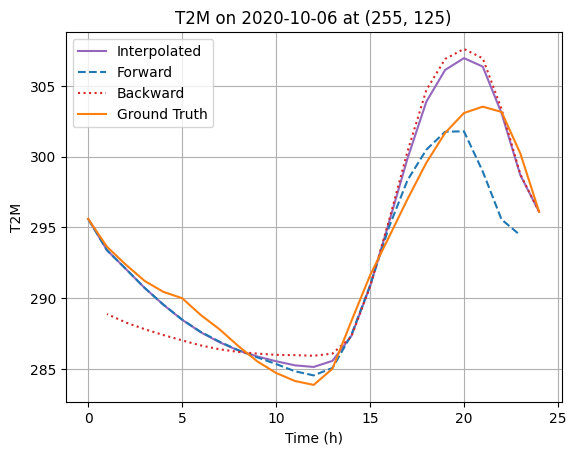

In [4]:
plot_point(7, 255, 125)

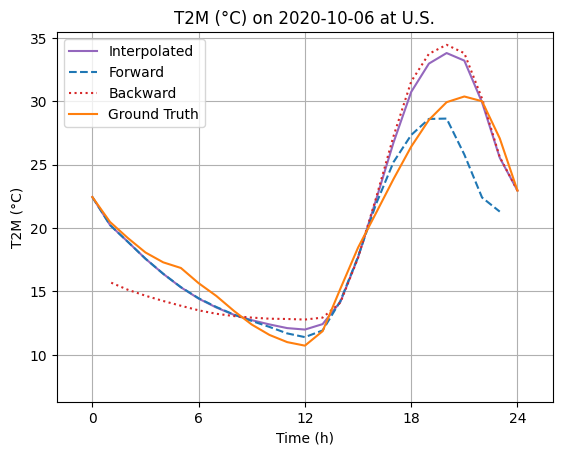

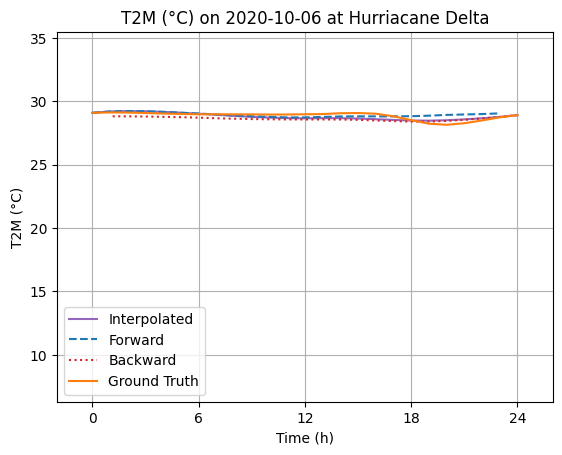

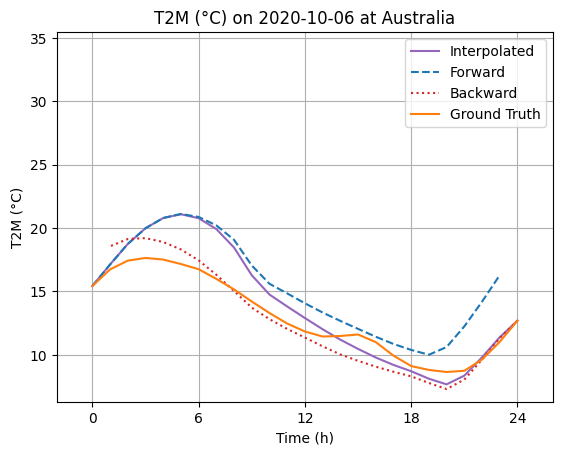

In [28]:
def plot_t2m(locations, titles):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    styles = {
        'Interpolated': 'solid',
        'Forward': 'dashed',
        'Backward': 'dotted',
        'Ground Truth': 'solid',
    }
    """
    colors = {
        'Interpolated': '#66CCEE',
        'Forward': '#228833',
        'Backward': '#AA3377',
        'Ground Truth': '#4477AA'
    }
    """
    colors = {
        'Interpolated': 'tab:purple',
        'Forward': 'tab:blue',
        'Backward': 'tab:red',
        'Ground Truth': 'tab:orange'
    }
    vmin = min((v[:,7,lat,lon].min() for v in a.values() for lat, lon in locations)) - 273.15
    vmax = max((v[:,7,lat,lon].max() for v in a.values() for lat, lon in locations)) - 273.15
        
    for i, (lat, lon) in enumerate(locations):
        for k, v in a.items():
            time_series = [i for i in range(25)]
            if k == 'Forward':
                time_series = time_series[:-1]
            elif k =='Backward':
                time_series = time_series[1:]
                time_series = time_series[::-1]

            plt.plot(time_series, v[:,7,lat,lon] - 273.15, label=k, color=colors[k], linestyle=styles[k])
        plt.grid()
        plt.xlabel('Time (h)')
        plt.ylabel('T2M (°C)')
        plt.xlim(-2, 26)
        plt.xticks((0, 6, 12, 18, 24))
        plt.ylim(vmin-1, vmax+1)
        if not titles or not titles[i]:
            append = f'({lat}, {lon})'
        else:
            append = titles[i]
        plt.title(f'T2M (°C) on 2020-{month:02d}-{day:02d} at {append}')
        plt.legend()
        plt.show()
        plt.close()

plot_t2m(((255, 125), (225, 150), (125, 500)), ('U.S.', 'Hurricane Delta', 'Australia'))

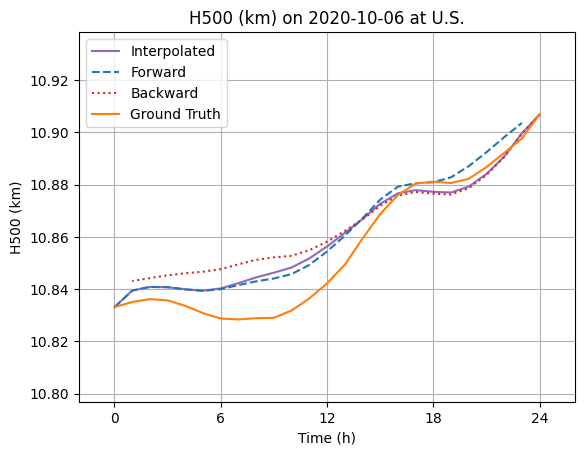

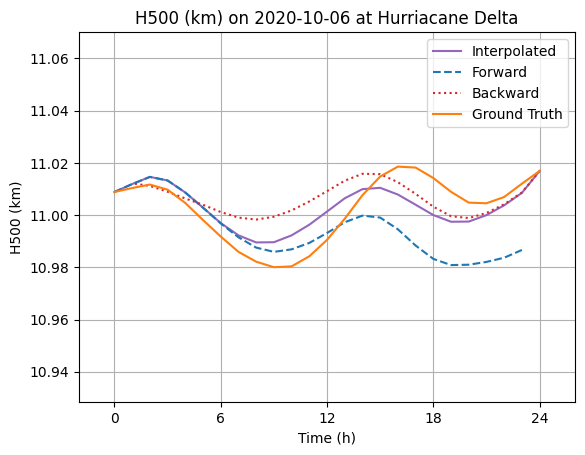

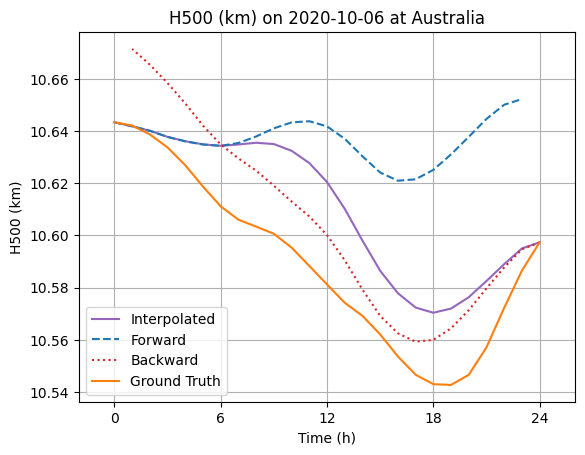

In [33]:
def plot_h500(locations, titles):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    styles = {
        'Interpolated': 'solid',
        'Forward': 'dashed',
        'Backward': 'dotted',
        'Ground Truth': 'solid',
    }
    """
    colors = {
        'Interpolated': '#66CCEE',
        'Forward': '#228833',
        'Backward': '#AA3377',
        'Ground Truth': '#4477AA'
    }
    """
    colors = {
        'Interpolated': 'tab:purple',
        'Forward': 'tab:blue',
        'Backward': 'tab:red',
        'Ground Truth': 'tab:orange'
    }
    vmin = min((v[:,0,lat,lon].min() for v in a.values() for lat, lon in locations))/1000
    vmax = max((v[:,0,lat,lon].max() for v in a.values() for lat, lon in locations))/1000
    
    diff = max((max((v[:,0,lat,lon].max() for v in a.values())) - min((v[:,0,lat,lon].min() for v in a.values())) for lat, lon in locations)) / 1000
        
    for i, (lat, lon) in enumerate(locations):
        for k, v in a.items():
            time_series = [i for i in range(25)]
            if k == 'Forward':
                time_series = time_series[:-1]
            elif k =='Backward':
                time_series = time_series[1:]
                time_series = time_series[::-1]

            plt.plot(time_series, v[:,0,lat,lon]/1000, label=k, color=colors[k], linestyle=styles[k])
        plt.grid()
        plt.xlabel('Time (h)')
        plt.ylabel('H500 (km)')
        plt.xlim(-2, 26)
        plt.xticks((0, 6, 12, 18, 24))
        
        curr_min = min((v[:,0,lat,lon].min() for v in a.values())) / 1000
        curr_max = max((v[:,0,lat,lon].max() for v in a.values())) / 1000
        delta = (diff*1.1 - curr_max + curr_min) / 2
        plt.ylim(curr_min - delta, curr_max + delta)
        
        if not titles or not titles[i]:
            append = f'({lat}, {lon})'
        else:
            append = titles[i]
        plt.title(f'H500 (km) on 2020-{month:02d}-{day:02d} at {append}')
        plt.legend()
        plt.show()
        plt.close()

plot_h500(((255, 125), (225, 150), (125, 500)), ('U.S.', 'Hurriacane Delta', 'Australia'))

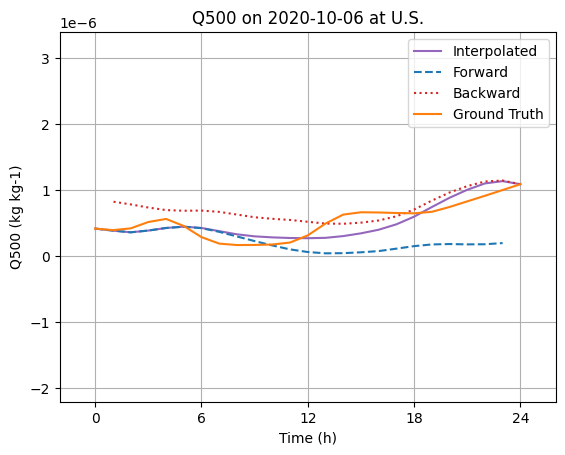

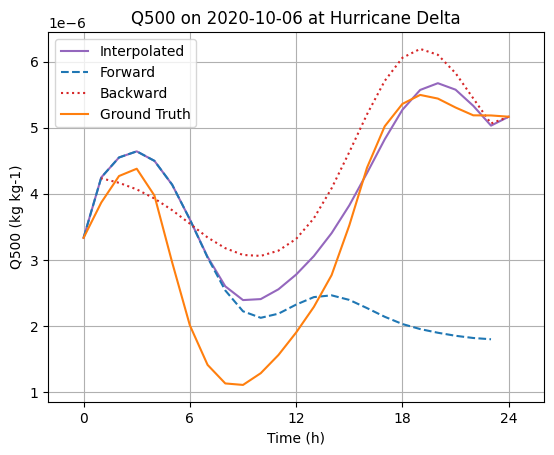

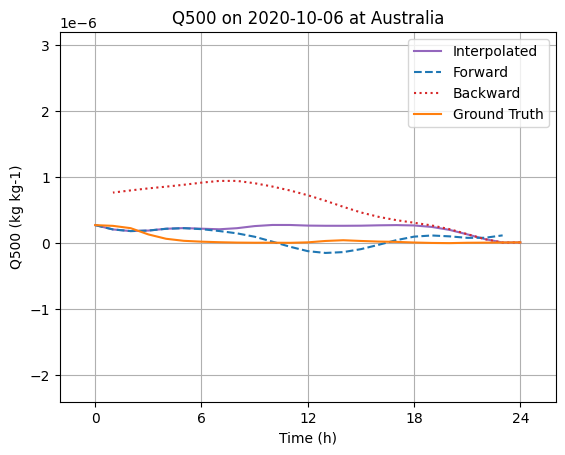

In [40]:
def plot_q500(locations, titles):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    styles = {
        'Interpolated': 'solid',
        'Forward': 'dashed',
        'Backward': 'dotted',
        'Ground Truth': 'solid',
    }
    """
    colors = {
        'Interpolated': '#66CCEE',
        'Forward': '#228833',
        'Backward': '#AA3377',
        'Ground Truth': '#4477AA'
    }
    """
    colors = {
        'Interpolated': 'tab:purple',
        'Forward': 'tab:blue',
        'Backward': 'tab:red',
        'Ground Truth': 'tab:orange'
    }
    vmin = min((v[:,4,lat,lon].min() for v in a.values() for lat, lon in locations))
    vmax = max((v[:,4,lat,lon].max() for v in a.values() for lat, lon in locations))
    
    diff = max((max((v[:,4,lat,lon].max() for v in a.values())) - min((v[:,4,lat,lon].min() for v in a.values())) for lat, lon in locations)) / 1000
        
    for i, (lat, lon) in enumerate(locations):
        for k, v in a.items():
            time_series = [i for i in range(25)]
            if k == 'Forward':
                time_series = time_series[:-1]
            elif k =='Backward':
                time_series = time_series[1:]
                time_series = time_series[::-1]

            plt.plot(time_series, v[:,4,lat,lon]/1000, label=k, color=colors[k], linestyle=styles[k])
        plt.grid()
        plt.xlabel('Time (h)')
        plt.ylabel('Q500 (kg kg-1)')
        plt.xlim(-2, 26)
        plt.xticks((0, 6, 12, 18, 24))
        
        curr_min = min((v[:,4,lat,lon].min() for v in a.values())) / 1000
        curr_max = max((v[:,4,lat,lon].max() for v in a.values())) / 1000
        delta = (diff*1.1 - curr_max + curr_min) / 2
        plt.ylim(curr_min - delta, curr_max + delta)
        if not titles or not titles[i]:
            append = f'({lat}, {lon})'
        else:
            append = titles[i]
        plt.title(f'Q500 on 2020-{month:02d}-{day:02d} at {append}')
        plt.legend()
        plt.show()
        plt.close()

plot_q500(((255, 125), (225, 150), (125, 500)), ('U.S.', 'Hurricane Delta', 'Australia'))

In [15]:
def plot_grid(locations):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    styles = {
        'Interpolated': 'solid',
        'Forward': 'dashed',
        'Backward': 'dotted',
        'Ground Truth': 'solid',
    }
    colors = {
        'Interpolated': 'tab:purple',
        'Forward': 'tab:blue',
        'Backward': 'tab:red',
        'Ground Truth': 'tab:orange'
    }
    fig, ax = plt.subplots(3, 3, constrained_layout=True)
    
    #T2M
    field = 7
    for i, (lat, lon) in enumerate(locations):
        for k, v in a.items():
            time_series = [i for i in range(25)]
            if k == 'Forward':
                time_series = time_series[:-1]
            elif k =='Backward':
                time_series = time_series[1:]
                time_series = time_series[::-1]
            ax[0][i].plot(time_series, v[:,field,lat,lon], label=k, color=colors[k], linestyle=styles[k])
            ax[0][i].grid()
            ax[0][i].title.set_text(variables[field] + f' on 2020-{month:02d}-{day:02d} at ({lat},{lon})')
        
        
    plt.grid()
    plt.xlabel('Time (h)')
    plt.ylabel(variables[field])
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


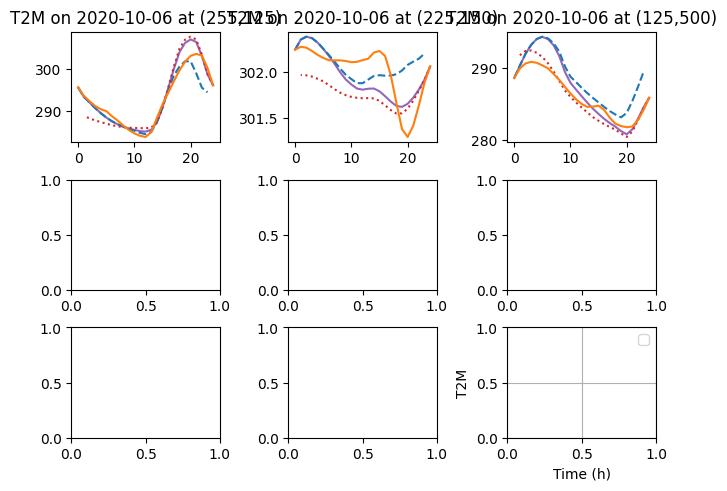

In [34]:
plot_grid([(255, 125), (225, 150), (125, 500)])

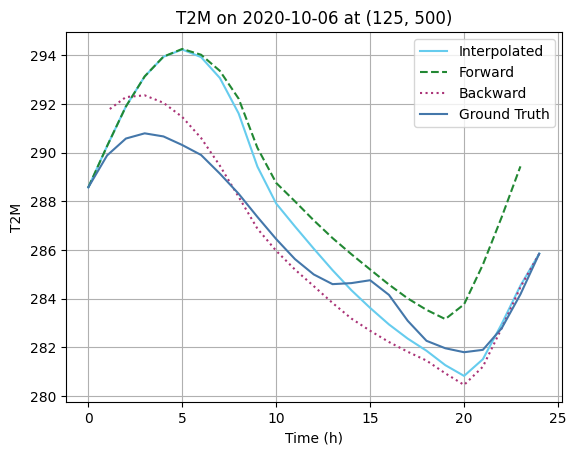

In [31]:
plot_point(7, 125, 500)

H500

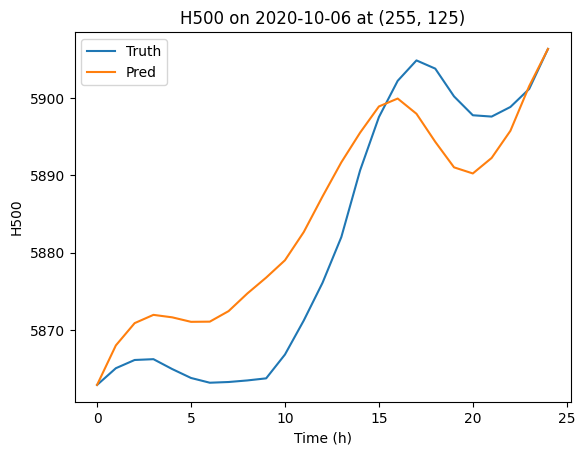

In [63]:
plot_point(1, 255, 125)

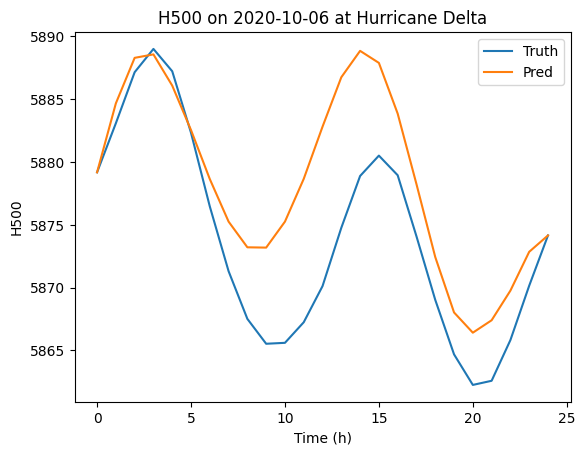

In [64]:
plot_point(1, 225, 150, append='Hurricane Delta')

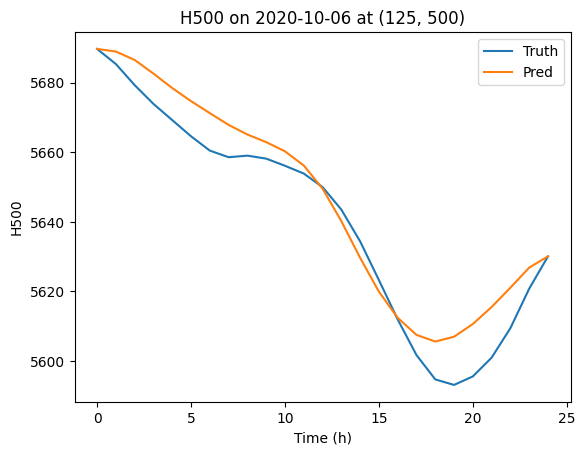

In [68]:
plot_point(1, 125, 500)

Q500

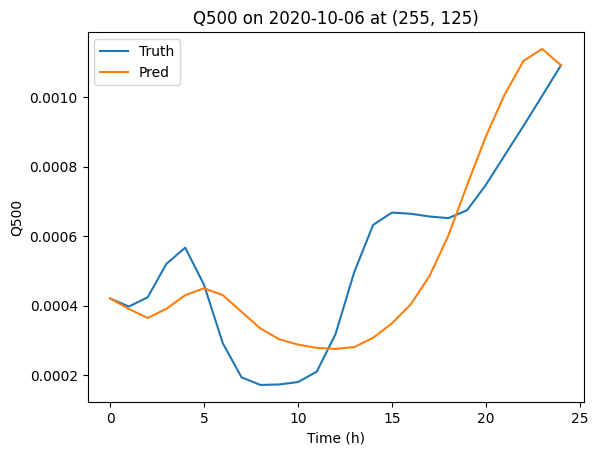

In [65]:
plot_point(4, 255, 125)

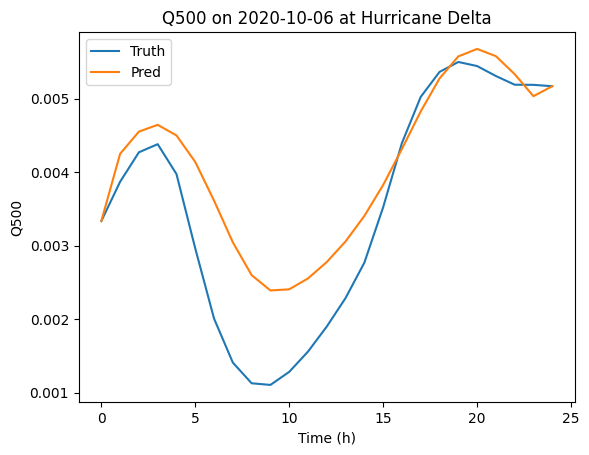

In [66]:
plot_point(4, 225, 150, append='Hurricane Delta')

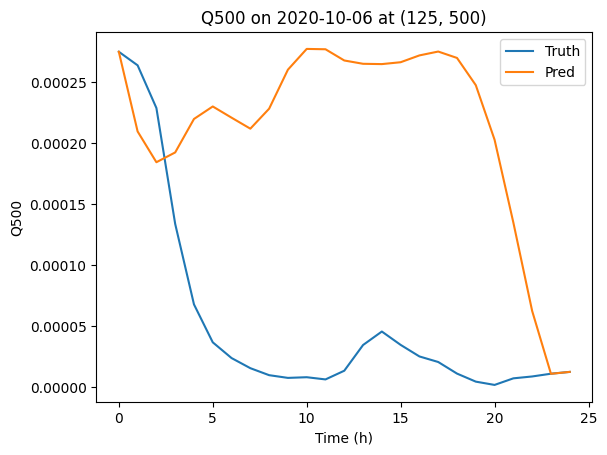

In [69]:
plot_point(4, 125, 500)

In [35]:
def plot_wind_speeds(time):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = np.sqrt(a[:,13,:,:]**2 + a[:,17,:,:]**2)
    slice_b = np.sqrt(b[:,13,:,:]**2 + b[:,17,:,:]**2)
    vmin = np.vstack([slice_a]).min()
    vmax = np.vstack([slice_a]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=vmin, vmax=vmax, cmap='viridis')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=vmin, vmax=vmax, cmap='viridis')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Wind Speeds on 2020-{month:02d}-{day:02d} at {time:02d}:00')
    #plt.savefig(f'UV500-{month:02d}{day:02d}-{time:02d}.png')
    plt.show()
    plt.close()

In [2]:
for i in range(25):
    plot_wind_speeds(i)

IndentationError: expected an indented block (2797303153.py, line 2)

In [8]:
def show_index(time, field=7):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    vmin = slice_a.min()#np.vstack([slice_a, slice_b]).min()
    vmax = slice_a.max()#np.vstack([slice_a, slice_b]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=vmin, vmax=vmax, cmap='plasma')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=vmin, vmax=vmax, cmap='plasma')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Forward T2M (K) on 2020-{month:02d}-{day:02d} at {time:02d}:00')
    plt.savefig(f'T2M-{month:02d}{day:02d}-{time:02d}.png')
    #plt.show()
    plt.close()

In [9]:
def backward_show_index(time, field=7):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    #vmin = np.vstack([slice_a, slice_b]).min()
    #vmax = np.vstack([slice_a, slice_b]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=slice_a.min(), vmax=slice_a.max(), cmap='plasma')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=slice_a.min(), vmax=slice_a.max(), cmap='plasma')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Backward Q500 (kg kg-1) on 2020-{month:02d}-{day:02d} at {23-time:02d}:00')
    #plt.savefig(f'Q500-{month:02d}{day:02d}-{time:02d}.png')
    #plt.close()

In [8]:
def interp_show_index(time, field=7):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    vmin = np.vstack([slice_a]).min()
    vmax = np.vstack([slice_a]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=vmin, vmax=vmax, cmap='viridis')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=vmin, vmax=vmax, cmap='viridis')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Interpolated T2M (K) on 2020-{month:02d}-{day:02d} at {time:02d}:00')
    #plt.savefig(f'T2M-{month:02d}{day:02d}-{time:02d}.png')
    plt.show()
    plt.close()

In [3]:
for i in range(1):
    interp_show_index(i)

NameError: name 'interp_show_index' is not defined

In [20]:
def plot_corr(field, prefix=''):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    times = np.arange(c.shape[0])
    plt.plot(times, c[:,field])
    plt.xlabel('Lead Time (h)')
    plt.ylabel('ACC')
    plt.title(prefix+' '+variables[field] + ' Anomaly Correlation Coefficient')
    plt.show()

In [14]:
def plot_multiple_corr(fields, prefix=''):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    times = np.arange(c.shape[0])
    for field in fields:
        plt.plot(times, c[:,field], label=variables[field])
    plt.xlabel('Lead Time (h)')
    plt.ylabel('ACC')
    plt.title(prefix+' ACC')
    plt.legend()
    plt.show()

In [6]:
plot_corr(4, prefix='Backward')

NameError: name 'plot_corr' is not defined

In [15]:
c = np.load(directory + '/anomaly_full.npy')
print(c[:,7])
c = np.load(directory + '/anomaly_north.npy')
print(c[:,7])

[1.         0.99635686 0.99151716 0.98609648 0.98025592 0.97344638
 0.96617406 0.95894802 0.95146356 0.94365172 0.93576984 0.92749911
 0.92049522 0.91564323 0.91253602 0.91315719 0.91915836 0.92982553
 0.94220941 0.95421397 0.96536872 0.97618885 0.98649478 0.99476345
 1.        ]
[1.         0.99530917 0.98896546 0.98212462 0.97529314 0.96856886
 0.96242242 0.9569339  0.95115566 0.94457257 0.93674653 0.92796463
 0.91891655 0.90992391 0.9012586  0.89938771 0.9062411  0.91953601
 0.93560545 0.94934774 0.96072716 0.9719612  0.98326085 0.99336223
 1.        ]


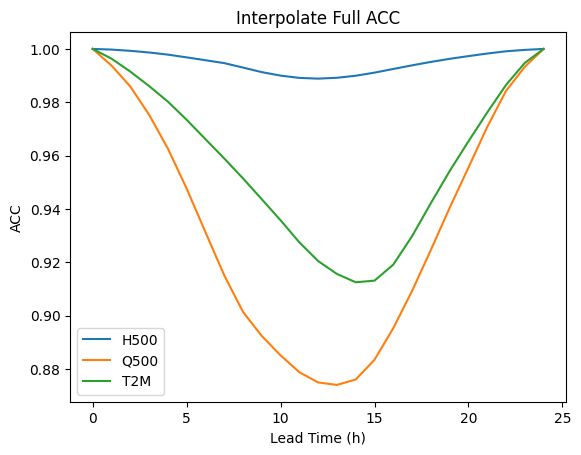

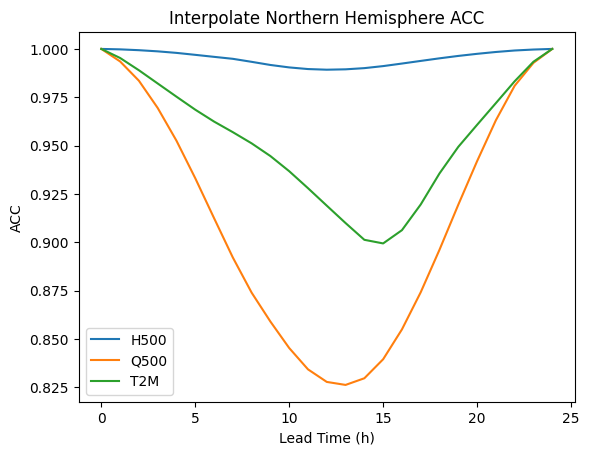

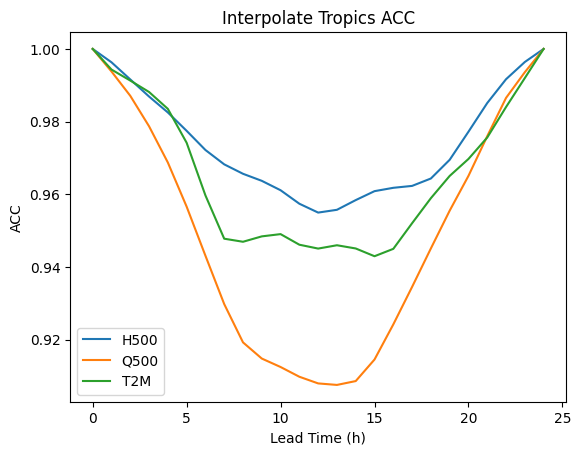

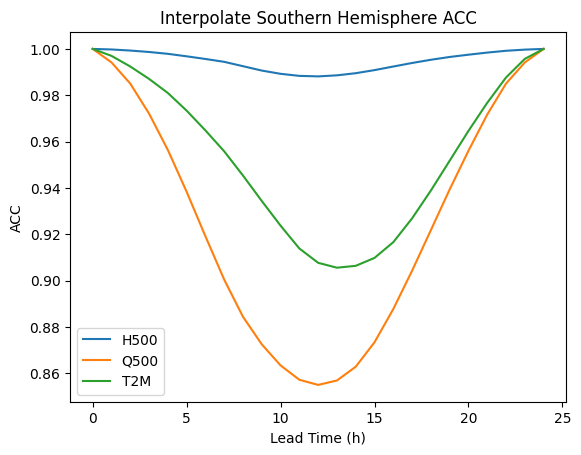

In [16]:
prefix = 'Interpolate'
c = np.load(directory + '/anomaly_full.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Full')
c = np.load(directory + '/anomaly_north.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Northern Hemisphere')
c = np.load(directory + '/anomaly_equator.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Tropics')
c = np.load(directory + '/anomaly_south.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Southern Hemisphere')

In [5]:
np.arange(24,0,-1)

array([24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2,  1])

In [23]:
def plot_interp_corr(fields, prefix=''):
    parent_dir = '/discover/nobackup/awang17/SFNO/'
    data = {
        'Forward ': np.load(parent_dir + 'afno_backbone_finetune/2/anomaly_full.npy'),
        'Backward ': np.load(parent_dir + 'backward/afno_backbone_finetune/1/anomaly_full.npy'),
        'Interpolate ': np.load(parent_dir + 'interpolate/anomaly_full.npy'),
    }
    times = {
        'Forward ': np.arange(24),
        'Backward ': np.arange(24,0,-1),
        'Interpolate ': np.arange(25)
    }
    styles = {
        'Forward ': 'dashed',
        'Backward ': 'dotted',
        'Interpolate ': 'solid'
    }
    ax = plt.gca()
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    for field in fields:
        color=next(ax._get_lines.prop_cycler)['color']
        for key, acc in data.items():
            time = times[key]
            plt.plot(time, acc[:,field], label=key + variables[field], linestyle=styles[key], color=color)
    plt.xlabel('Lead Time (h)')
    plt.ylabel('ACC')
    plt.title(prefix+' ACC')
    plt.legend()
    plt.show()

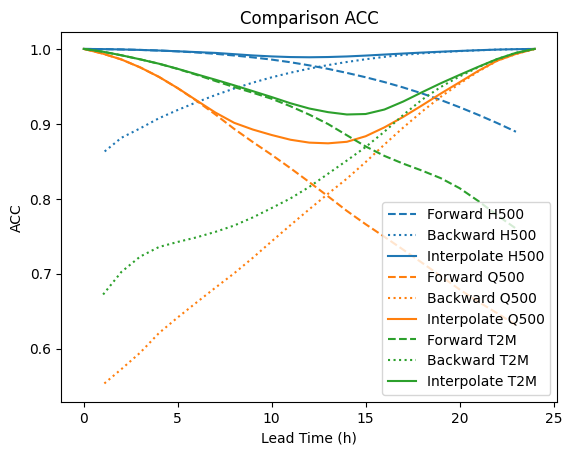

In [24]:
plot_interp_corr([1,4,7], prefix='Comparison')

In [30]:
from datetime import datetime, timedelta

In [31]:
start = datetime(2020, 1, 1, 0, 0, 0)
start

datetime.datetime(2020, 1, 1, 0, 0)

In [36]:
offset = start + timedelta(hours=3528)

In [41]:
"{:02d}{:02d}".format(offset.month, offset.day)

'0527'

In [40]:
offset

datetime.datetime(2020, 5, 27, 0, 0)

In [6]:
m = xr.open_dataset('/css/merra2/MERRA2_all/Y2020/M12/MERRA2.tavg1_2d_slv_Nx.20201223.nc4')

In [7]:
m['Q500']

<xarray.DataArray 'Q500' (time: 24, lat: 361, lon: 576)>
[4990464 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2020-12-23T00:30:00 ... 2020-12-23T23:30:00
Attributes:
    long_name:       specific_humidity_at_500_hPa
    units:           kg kg-1
    fmissing_value:  1000000000000000.0
    standard_name:   specific_humidity_at_500_hPa
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [8]:
m['Q500'].data

array([[[0.00021488, 0.00021488, 0.00021488, ..., 0.00021488,
         0.00021488, 0.00021488],
        [0.00016904, 0.00016881, 0.00016857, ..., 0.00016988,
         0.00016958, 0.00016934],
        [0.00011302, 0.00011248, 0.00011194, ..., 0.00011457,
         0.00011406, 0.00011355],
        ...,
        [0.00016702, 0.00016708, 0.00016714, ..., 0.00016684,
         0.0001669 , 0.00016696],
        [0.0001722 , 0.00017226, 0.00017232, ..., 0.00017208,
         0.00017214, 0.0001722 ],
        [0.00017983, 0.00017983, 0.00017983, ..., 0.00017983,
         0.00017983, 0.00017983]],

       [[0.00021577, 0.00021577, 0.00021577, ..., 0.00021577,
         0.00021577, 0.00021577],
        [0.00017506, 0.00017483, 0.00017465, ..., 0.00017572,
         0.00017548, 0.00017524],
        [0.00011787, 0.00011731, 0.00011671, ..., 0.00011954,
         0.00011901, 0.00011844],
        ...,
        [0.00016922, 0.00016934, 0.0001694 , ..., 0.00016892,
         0.00016904, 0.0001691 ],
        [0.0

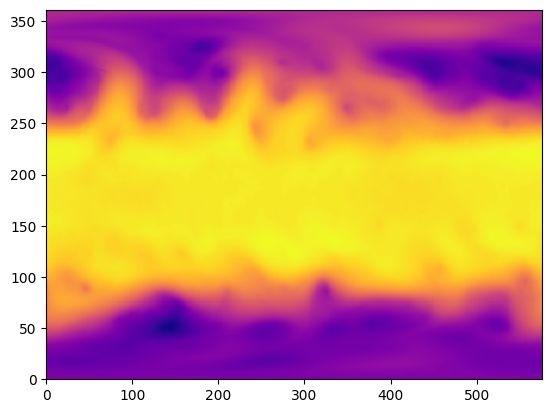

In [26]:
plt.pcolormesh(c[10, :, :], cmap='plasma')
plt.show()

In [40]:
m['T2M'].data

array([[[244.16364, 244.16364, 244.16364, ..., 244.16364, 244.16364,
         244.16364],
        [243.72614, 243.73395, 243.74176, ..., 243.71051, 243.71832,
         243.72614],
        [242.91364, 242.92145, 242.92926, ..., 242.89801, 242.90582,
         242.91364],
        ...,
        [252.80426, 252.81207, 252.82379, ..., 252.77692, 252.78864,
         252.79645],
        [253.6402 , 253.6441 , 253.64801, ..., 253.62848, 253.63239,
         253.63629],
        [255.0191 , 255.0191 , 255.0191 , ..., 255.0191 , 255.0191 ,
         255.0191 ]],

       [[244.0921 , 244.0921 , 244.0921 , ..., 244.0921 , 244.0921 ,
         244.0921 ],
        [243.6546 , 243.66241, 243.66241, ..., 243.63898, 243.64679,
         243.64679],
        [242.95929, 242.9671 , 242.97491, ..., 242.94366, 242.95148,
         242.95148],
        ...,
        [253.19366, 253.20148, 253.20538, ..., 253.17413, 253.17804,
         253.18585],
        [254.4046 , 254.40851, 254.41241, ..., 254.39679, 254.4007 ,
   

In [3]:
dset = xr.open_dataset(f'/css/merra2/MERRA2_all/Y2020/M{month:02d}/MERRA2.tavg1_2d_slv_Nx.2020{month:02d}{day:02d}.nc4')

In [4]:
dset['Q500']

<xarray.DataArray 'Q500' (time: 24, lat: 361, lon: 576)>
[4990464 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2020-10-06T00:30:00 ... 2020-10-06T23:30:00
Attributes:
    long_name:       specific_humidity_at_500_hPa
    units:           kg kg-1
    fmissing_value:  1000000000000000.0
    standard_name:   specific_humidity_at_500_hPa
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

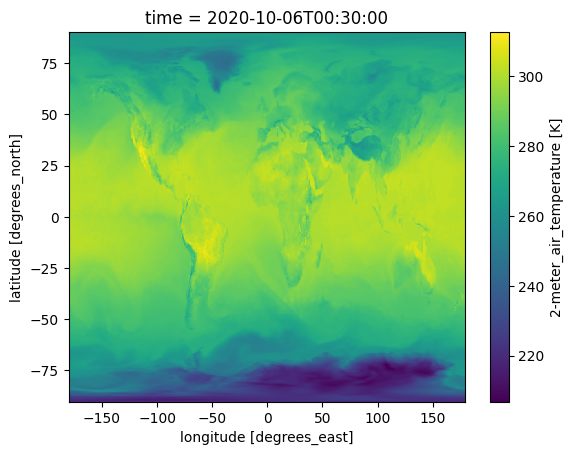

In [5]:
dset['T2M'].isel(time=0).plot()

FullArgSpec(args=['self', 'resolution', 'color'], varargs=None, varkw='kwargs', defaults=('auto', 'black'), kwonlyargs=[], kwonlydefaults=None, annotations={})


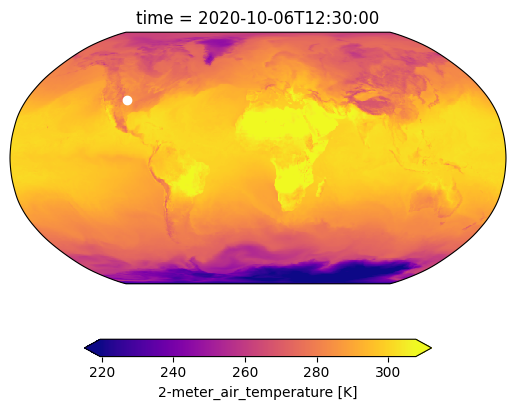

In [27]:
def transform_to_latlon(y, x):
    lat = (y - 180) / 361 * 180
    lon = (x - 576 / 2) / 576 * 360
    return lat, lon

def xarray_plot_map(time, lat, lon, field=7):
    lat, lon = transform_to_latlon(lat, lon)
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))
    dset[variables[field]].isel(time=time).plot(
        ax=axis,
        transform=ccrs.PlateCarree(),  # this is important!
        # usual xarray stuff
        cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
        robust=True,
        cmap='plasma'
    )
    axis.plot(lon, lat, 'wo', transform=ccrs.PlateCarree())
    print(inspect.getfullargspec(axis.coastlines))

xarray_plot_map(12, 255, 125, field=7)

In [25]:
import inspect
inspect.getargspec(xarray_plot_map)

/gpfsm/dnb34/tdirs/batch/slurm.32043611.awang17/ipykernel_7252/3679397091.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  inspect.getargspec(xarray_plot_map)


ArgSpec(args=['time', 'lat', 'lon', 'field'], varargs=None, keywords=None, defaults=(7,))

In [3]:
def interp_show_index(time, field=4):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5), subplot_kw=dict(projection=ccrs.PlateCarree()))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    vmin = np.vstack([slice_a]).min()
    vmax = np.vstack([slice_a]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=vmin, vmax=vmax, cmap='viridis', transform=ccrs.PlateCarree())
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=vmin, vmax=vmax, cmap='viridis', transform=ccrs.PlateCarree())
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Interpolated T2M (K) on 2020-{month:02d}-{day:02d} at {time:02d}:00')
    #plt.savefig(f'T2M-{month:02d}{day:02d}-{time:02d}.png')
    plt.show()
    plt.close()

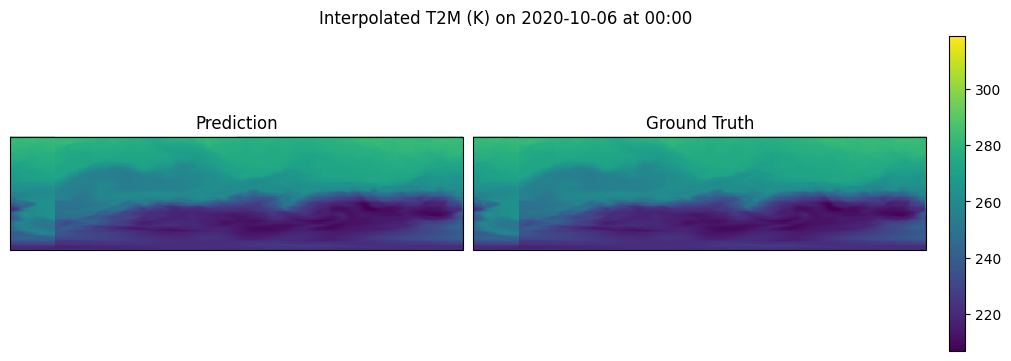

In [4]:
interp_show_index(0, field=7)